## Araç Fiyat Tahmini ve Analizi

Kullanacağımız kütüphaneleri import edelim.

In [76]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



Kullanacağımız veri setini dosya yolunu alarak *pandas* kütüphanesinin **read_csv()** metodu sayesinde entegre edelim.

In [77]:
dataset_path='../data/cars.csv'
df=pd.read_csv(dataset_path)

### Veri setine ilk bakış...

In [78]:
df.head()

,OFF_BY_COMPANY,CAR_NAME,Transmission _Type,KM_DIVEN_BY,OWNER_TYPE,FUEL_TYPE,EMI,SELLING_PRICE,DOWNPAYMENT,TOTAL_PRICE
0,"₹29,000 OFF",2015 Maruti Swift,Manual,"37,925 km",1st Owner,Diesel,"₹9,036/month","₹ 4,06,199.00",Zero downpayment,"₹ 4,35,199.00"
1,"₹25,000 OFF",2020 KIA SELTOS,Manual,"5,822 km",2nd Owner,Petrol,"₹25,499/month","₹ 11,46,299.00",Zero downpayment,"₹ 11,71,299.00"
2,"₹32,000 OFF",2015 Maruti S Cross,Manual,"95,369 km",1st Owner,Diesel,"₹13,376/month","₹ 6,01,299.00",Zero downpayment,"₹ 6,33,299.00"
3,"₹16,000 OFF",2018 Renault Kwid,Manual,"33,167 km",2nd Owner,Petrol,"₹6,371/month","₹ 2,86,399.00",Zero downpayment,"₹ 3,02,399.00"
4,"₹43,000 OFF",2017 Hyundai Creta,Manual,"19,885 km",1st Owner,Diesel,"₹17,847/month","₹ 8,02,299.00",Zero downpayment,"₹ 8,45,299.00"


Veri ön işleme kısmında baya bir işimiz var gibi duruyor. Bir de diğer detaylara bakalım.

In [79]:
df.shape, df.info() , df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   OFF_BY_COMPANY      1072 non-null   object
 1   CAR_NAME            1083 non-null   object
 2   Transmission _Type  1057 non-null   object
 3   KM_DIVEN_BY         1083 non-null   object
 4   OWNER_TYPE          1083 non-null   object
 5   FUEL_TYPE           1083 non-null   object
 6   EMI                 1083 non-null   object
 7   SELLING_PRICE       1083 non-null   object
 8   DOWNPAYMENT         1083 non-null   object
 9   TOTAL_PRICE         1072 non-null   object
dtypes: object(10)
memory usage: 84.8+ KB


((1084, 10),
 None,
        OFF_BY_COMPANY          CAR_NAME  Transmission _Type KM_DIVEN_BY  \
 count            1072               1083               1057        1083   
 unique             46                239                  2         804   
 top        ₹5,000 OFF  2015 Maruti Swift             Manual   20,259 km   
 freq              174                 33                990           3   
 
        OWNER_TYPE FUEL_TYPE            EMI  SELLING_PRICE       DOWNPAYMENT  \
 count        1083      1083           1083           1083              1083   
 unique          4         3            763            763                 1   
 top     1st Owner    Petrol  ₹10,526/month  ₹ 4,73,199.00  Zero downpayment   
 freq          914       637              6              6              1083   
 
           TOTAL_PRICE  
 count            1072  
 unique            743  
 top     ₹ 5,73,099.00  
 freq                6  )

Veri setimizde **1084 satır | 10 sütun** olacak şekilde olduğunu görüyoruz. Ayrıca her bir sütun özelliklerini **object** yapısında olduğunu görüyoruz ve bu özellikler kendi içerisinde **string**, **int** ve **float** olarak farklı veri tiplerine dönüştürülebilecek şeklinde gözüküyor.

### Veri ön işleme süreci başlasın...

Öncelikle sütun adlarını daha anlaşılabilir olması için türkçeye çevirelim.

In [80]:
#Sütun adlarını değiştirmeden önce boşluk varsa onu kaldıralım.
df.columns = df.columns.str.strip()
#Sütun adlarını değiştirelim.
df=df.rename(columns={
    'OFF_BY_COMPANY':'kampanya',
    'CAR_NAME':'araba_adi',
    'Transmission _Type':'vites_tipi',
    'KM_DIVEN_BY':'km',
    'OWNER_TYPE':'sahiplik',
    'FUEL_TYPE':'yakit_tipi',
    'EMI':'aylik_taksit',
    'SELLING_PRICE':'satis_fiyati',
    'DOWNPAYMENT':'pesinat_bilgisi',
    'TOTAL_PRICE':'toplam_fiyat'
    })
    

Sütun adlarını değiştirdik yine de garanti olması için karakter boşlukları varsa onları bir temizleyelim, ileride sıkıntı çıkarmasın.

In [81]:
df.columns = df.columns.str.strip()
df.head()

,kampanya,araba_adi,vites_tipi,km,sahiplik,yakit_tipi,aylik_taksit,satis_fiyati,pesinat_bilgisi,toplam_fiyat
0,"₹29,000 OFF",2015 Maruti Swift,Manual,"37,925 km",1st Owner,Diesel,"₹9,036/month","₹ 4,06,199.00",Zero downpayment,"₹ 4,35,199.00"
1,"₹25,000 OFF",2020 KIA SELTOS,Manual,"5,822 km",2nd Owner,Petrol,"₹25,499/month","₹ 11,46,299.00",Zero downpayment,"₹ 11,71,299.00"
2,"₹32,000 OFF",2015 Maruti S Cross,Manual,"95,369 km",1st Owner,Diesel,"₹13,376/month","₹ 6,01,299.00",Zero downpayment,"₹ 6,33,299.00"
3,"₹16,000 OFF",2018 Renault Kwid,Manual,"33,167 km",2nd Owner,Petrol,"₹6,371/month","₹ 2,86,399.00",Zero downpayment,"₹ 3,02,399.00"
4,"₹43,000 OFF",2017 Hyundai Creta,Manual,"19,885 km",1st Owner,Diesel,"₹17,847/month","₹ 8,02,299.00",Zero downpayment,"₹ 8,45,299.00"


Şimdi de **null** değer var mı kontrol edelim.

In [82]:
df.isnull().sum()

kampanya           12
araba_adi           1
vites_tipi         27
km                  1
sahiplik            1
yakit_tipi          1
aylik_taksit        1
satis_fiyati        1
pesinat_bilgisi     1
toplam_fiyat       12
dtype: int64

Veri setinin boyutuna göre çok az null değer var bunlarla uğraşıp zaman kaybetmektense direkt o satırları silebiliriz.

In [83]:
df=df.dropna()

Silme işleminden sonra tekrar kontrol edelim.

In [84]:
df.isnull().sum()

kampanya           0
araba_adi          0
vites_tipi         0
km                 0
sahiplik           0
yakit_tipi         0
aylik_taksit       0
satis_fiyati       0
pesinat_bilgisi    0
toplam_fiyat       0
dtype: int64

Güzel. Sırada object değerleri makinenin anlayacağı formata ve değerlere çevirmek var.

In [85]:
df.head()

,kampanya,araba_adi,vites_tipi,km,sahiplik,yakit_tipi,aylik_taksit,satis_fiyati,pesinat_bilgisi,toplam_fiyat
0,"₹29,000 OFF",2015 Maruti Swift,Manual,"37,925 km",1st Owner,Diesel,"₹9,036/month","₹ 4,06,199.00",Zero downpayment,"₹ 4,35,199.00"
1,"₹25,000 OFF",2020 KIA SELTOS,Manual,"5,822 km",2nd Owner,Petrol,"₹25,499/month","₹ 11,46,299.00",Zero downpayment,"₹ 11,71,299.00"
2,"₹32,000 OFF",2015 Maruti S Cross,Manual,"95,369 km",1st Owner,Diesel,"₹13,376/month","₹ 6,01,299.00",Zero downpayment,"₹ 6,33,299.00"
3,"₹16,000 OFF",2018 Renault Kwid,Manual,"33,167 km",2nd Owner,Petrol,"₹6,371/month","₹ 2,86,399.00",Zero downpayment,"₹ 3,02,399.00"
4,"₹43,000 OFF",2017 Hyundai Creta,Manual,"19,885 km",1st Owner,Diesel,"₹17,847/month","₹ 8,02,299.00",Zero downpayment,"₹ 8,45,299.00"


Bakıldığında öncelikli olarak direkt **integer** veri tipine çevirilebilecek olanlara bakalım.
*Kampanya*, *km*, *aylık taksit*, *satış fiyatı* ve *toplam fiyat* özelliklerinin içerisindeki string değerleri kaldırıp integer değerlere çevirebiliriz.

In [86]:
def clean_column(value, remove_items=None):
    if pd.isna(value):
        return None
    try:
        value = str(value)  # Veriyi stringe çevir
        if remove_items:
            for item in remove_items:  # Belirtilen karakterleri kaldır
                value = value.replace(item, '')
        value = value.replace(',', '')  # Virgülleri kaldır
        value = value.strip()  # Kenar boşluklarını temizle
        return float(value)  # Sayıya çevir
    except:
        return None 

df['aylik_taksit'] = df['aylik_taksit'].apply(clean_column, remove_items=['₹', '/month'])
df['km'] = df['km'].apply(clean_column, remove_items=['km'])
df['satis_fiyati'] = df['satis_fiyati'].apply(clean_column, remove_items=['₹'])
df['toplam_fiyat'] = df['toplam_fiyat'].apply(clean_column, remove_items=['₹'])
df['kampanya']= df['kampanya'].apply(clean_column, remove_items=['₹','OFF'])

Sonucu kontrol edelim.

In [87]:
df.head()

,kampanya,araba_adi,vites_tipi,km,sahiplik,yakit_tipi,aylik_taksit,satis_fiyati,pesinat_bilgisi,toplam_fiyat
0,29000.0,2015 Maruti Swift,Manual,37925.0,1st Owner,Diesel,9036.0,406199.0,Zero downpayment,435199.0
1,25000.0,2020 KIA SELTOS,Manual,5822.0,2nd Owner,Petrol,25499.0,1146299.0,Zero downpayment,1171299.0
2,32000.0,2015 Maruti S Cross,Manual,95369.0,1st Owner,Diesel,13376.0,601299.0,Zero downpayment,633299.0
3,16000.0,2018 Renault Kwid,Manual,33167.0,2nd Owner,Petrol,6371.0,286399.0,Zero downpayment,302399.0
4,43000.0,2017 Hyundai Creta,Manual,19885.0,1st Owner,Diesel,17847.0,802299.0,Zero downpayment,845299.0


Gayet güzel, hatasız gözüküyor.

Şimdi ise string değerlerden direkt **integer** değerlere çeviremeyeceğimiz sütunlara bir göz atalım. Kaç tane **benzersiz (unique)** özellikleri varmış?

In [88]:
df['vites_tipi'].unique() , df['yakit_tipi'].unique() , df['sahiplik'].unique() , df['pesinat_bilgisi'].unique()

(array(['Manual', 'Automatic'], dtype=object),
 array(['Diesel', 'Petrol', 'Petrol + CNG'], dtype=object),
 array(['1st Owner', '2nd Owner', '4th Owner', '3rd Owner'], dtype=object),
 array(['Zero downpayment'], dtype=object))

Bu 4 özelliğin **unique** değerleri çok az sayıda olduğundan bu iyi bir şey veri karmaşıklığını önler.
Ben bu özelliklerden peşinat bilgisi, vites ve yakıt tipi özelliklerini *pandas*'ın **get_dummies()** metodunu kullanarak ***true/false*** formunda yazmak istiyorum.
Sahiplik özelliğini ise *sklearn* kütüphanesinden **LabelEncoder()** metodunu kullanarak her bir **unique** değere sayısal veri atamak istiyorum.

In [89]:
df['vites_tipi'] = df['vites_tipi'].str.lower().str.strip()
df['yakit_tipi'] = df['yakit_tipi'].str.lower().str.strip()
df['sahiplik'] = df['sahiplik'].str.lower().str.strip()
df['sahiplik'] = df['pesinat_bilgisi'].str.lower().str.strip()

le = LabelEncoder()
df['sahiplik'] = le.fit_transform(df['sahiplik'])

df = pd.get_dummies(df, columns=['vites_tipi', 'yakit_tipi','pesinat_bilgisi'])


In [90]:
df.head()

,kampanya,araba_adi,km,sahiplik,aylik_taksit,satis_fiyati,toplam_fiyat,vites_tipi_automatic,vites_tipi_manual,yakit_tipi_diesel,yakit_tipi_petrol,yakit_tipi_petrol + cng,pesinat_bilgisi_Zero downpayment
0,29000.0,2015 Maruti Swift,37925.0,0,9036.0,406199.0,435199.0,False,True,True,False,False,True
1,25000.0,2020 KIA SELTOS,5822.0,0,25499.0,1146299.0,1171299.0,False,True,False,True,False,True
2,32000.0,2015 Maruti S Cross,95369.0,0,13376.0,601299.0,633299.0,False,True,True,False,False,True
3,16000.0,2018 Renault Kwid,33167.0,0,6371.0,286399.0,302399.0,False,True,False,True,False,True
4,43000.0,2017 Hyundai Creta,19885.0,0,17847.0,802299.0,845299.0,False,True,True,False,False,True


Tam istediğimiz gibi oldu.
Sahiplik özelliğini sırasıyla 0,1,2,3 değerleri ile değiştirdi.
Vites ,yakıt tiplerini ve peşinat bilgisini bulunduğu satırda hangi özelliği var ise onu **True** diğer özellikleri **False** yaparak değiştirdi.

Şimdi de araba adı sütununa bakalım.

In [91]:
df['araba_adi'].nunique() , df['araba_adi'].unique()

(233,
 array(['2015 Maruti Swift', '2020 KIA SELTOS', '2015 Maruti S Cross',
        '2018 Renault Kwid', '2017 Hyundai Creta', '2019 Maruti Swift',
        '2014 Hyundai Elite i20', '2019 Maruti Baleno',
        '2020 Maruti New  Wagon-R', '2015 BMW 3 Series',
        '2015 Maruti Ertiga', '2016 Maruti Swift Dzire',
        '2017 Maruti Ertiga', '2013 Toyota Innova', '2015 Hyundai Creta',
        '2013 Toyota Fortuner', '2015 Hyundai Elite i20',
        '2015 Maruti Baleno', '2015 Audi Q3', '2013 Honda Amaze',
        '2014 Toyota Etios', '2016 Maruti Vitara Brezza',
        '2013 Maruti Swift Dzire', '2021 Hyundai VENUE',
        '2017 Maruti Ciaz', '2018 Mahindra Thar', '2016 Maruti S Cross',
        '2016 Mercedes Benz E Class', '2015 Toyota Fortuner',
        '2018 Hyundai Tucson New', '2014 Ford Ecosport',
        '2014 Volkswagen Polo', '2018 Ford Ecosport',
        '2018 Toyota Fortuner', '2015 Maruti Swift Dzire',
        '2016 Hyundai Elite i20', '2015 Ford Ecosport',
       

Tamı tamına **233** tane farklı özellik var. Bu biraz uğraştıracak tek seferde halletmeyelim ikiye bölerek yapalım.

**Araba adı** sütununu *üretim yılı* ve *marka-model* olacak şekilde ikiye ayıralım.

In [92]:
df['uretim_yili'] = df['araba_adi'].str.extract(r'(\d{4})')  # Üretim yılına dair 4 rakamı alıyoruz
df['marka_model'] = df['araba_adi'].str.replace(r'^\d{4} ', '', regex=True)  # Yılı sildikten sonra sadece marka ve model

In [93]:
df.head()

,kampanya,araba_adi,km,sahiplik,aylik_taksit,satis_fiyati,toplam_fiyat,vites_tipi_automatic,vites_tipi_manual,yakit_tipi_diesel,yakit_tipi_petrol,yakit_tipi_petrol + cng,pesinat_bilgisi_Zero downpayment,uretim_yili,marka_model
0,29000.0,2015 Maruti Swift,37925.0,0,9036.0,406199.0,435199.0,False,True,True,False,False,True,2015,Maruti Swift
1,25000.0,2020 KIA SELTOS,5822.0,0,25499.0,1146299.0,1171299.0,False,True,False,True,False,True,2020,KIA SELTOS
2,32000.0,2015 Maruti S Cross,95369.0,0,13376.0,601299.0,633299.0,False,True,True,False,False,True,2015,Maruti S Cross
3,16000.0,2018 Renault Kwid,33167.0,0,6371.0,286399.0,302399.0,False,True,False,True,False,True,2018,Renault Kwid
4,43000.0,2017 Hyundai Creta,19885.0,0,17847.0,802299.0,845299.0,False,True,True,False,False,True,2017,Hyundai Creta


Marka-model sayısını unique değer sayısını kaça düşürmüşüz ona bakalım.

In [94]:
df['marka_model'].nunique()

79

79 gayet kabul edilebilir bir seviye oldu. **Label-encoding** işlemini buna da uygulayalım.

In [95]:
df['marka_model'] = le.fit_transform(df['marka_model'])

In [96]:
df.head()

,kampanya,araba_adi,km,sahiplik,aylik_taksit,satis_fiyati,toplam_fiyat,vites_tipi_automatic,vites_tipi_manual,yakit_tipi_diesel,yakit_tipi_petrol,yakit_tipi_petrol + cng,pesinat_bilgisi_Zero downpayment,uretim_yili,marka_model
0,29000.0,2015 Maruti Swift,37925.0,0,9036.0,406199.0,435199.0,False,True,True,False,False,True,2015,57
1,25000.0,2020 KIA SELTOS,5822.0,0,25499.0,1146299.0,1171299.0,False,True,False,True,False,True,2020,33
2,32000.0,2015 Maruti S Cross,95369.0,0,13376.0,601299.0,633299.0,False,True,True,False,False,True,2015,55
3,16000.0,2018 Renault Kwid,33167.0,0,6371.0,286399.0,302399.0,False,True,False,True,False,True,2018,67
4,43000.0,2017 Hyundai Creta,19885.0,0,17847.0,802299.0,845299.0,False,True,True,False,False,True,2017,18


Artık araba adı sütunu ile işimiz kalmadı, kaldırabiliriz.

In [97]:
df=df.drop(columns=['araba_adi'])

Son hali bu şekilde...

In [98]:
df.head()

,kampanya,km,sahiplik,aylik_taksit,satis_fiyati,toplam_fiyat,vites_tipi_automatic,vites_tipi_manual,yakit_tipi_diesel,yakit_tipi_petrol,yakit_tipi_petrol + cng,pesinat_bilgisi_Zero downpayment,uretim_yili,marka_model
0,29000.0,37925.0,0,9036.0,406199.0,435199.0,False,True,True,False,False,True,2015,57
1,25000.0,5822.0,0,25499.0,1146299.0,1171299.0,False,True,False,True,False,True,2020,33
2,32000.0,95369.0,0,13376.0,601299.0,633299.0,False,True,True,False,False,True,2015,55
3,16000.0,33167.0,0,6371.0,286399.0,302399.0,False,True,False,True,False,True,2018,67
4,43000.0,19885.0,0,17847.0,802299.0,845299.0,False,True,True,False,False,True,2017,18


Araçların marka-model, üretim yılı, km, vites türü, yakıt türü ve sahiplik özelliklerine göre fiyat tahmini yapması için modellemek istiyorum. Bu yüzden aracın fiyatına etki etmeyen kampanya, peşinat, aylık taksit, satış fiyatı özelliklerini kaldırıyorum.

In [99]:
deleted_columns=['kampanya','aylik_taksit','satis_fiyati','pesinat_bilgisi_Zero downpayment']
df=df.drop(columns=deleted_columns)

In [100]:
df.head()

,km,sahiplik,toplam_fiyat,vites_tipi_automatic,vites_tipi_manual,yakit_tipi_diesel,yakit_tipi_petrol,yakit_tipi_petrol + cng,uretim_yili,marka_model
0,37925.0,0,435199.0,False,True,True,False,False,2015,57
1,5822.0,0,1171299.0,False,True,False,True,False,2020,33
2,95369.0,0,633299.0,False,True,True,False,False,2015,55
3,33167.0,0,302399.0,False,True,False,True,False,2018,67
4,19885.0,0,845299.0,False,True,True,False,False,2017,18


Özellik veri tiplerini tekrar kontrol edelim.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   km                       1047 non-null   float64
 1   sahiplik                 1047 non-null   int64  
 2   toplam_fiyat             1047 non-null   float64
 3   vites_tipi_automatic     1047 non-null   bool   
 4   vites_tipi_manual        1047 non-null   bool   
 5   yakit_tipi_diesel        1047 non-null   bool   
 6   yakit_tipi_petrol        1047 non-null   bool   
 7   yakit_tipi_petrol + cng  1047 non-null   bool   
 8   uretim_yili              1047 non-null   object 
 9   marka_model              1047 non-null   int64  
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 54.2+ KB


**Float** tipindeki verileri **integer** olarak çevirebiliriz çünkü virgüllü sayıları kullanmıyoruz grafiklerde sıkıntı çekmeyelim. Üretim yılı özelliğini de **int** olarak değiştirelim.

In [102]:
float_column = df.select_dtypes(include='float').columns
df[float_column] = df[float_column].astype(int)

object_column = df.select_dtypes(include='object').columns
df[object_column] = df[object_column].astype(int)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   km                       1047 non-null   int64
 1   sahiplik                 1047 non-null   int64
 2   toplam_fiyat             1047 non-null   int64
 3   vites_tipi_automatic     1047 non-null   bool 
 4   vites_tipi_manual        1047 non-null   bool 
 5   yakit_tipi_diesel        1047 non-null   bool 
 6   yakit_tipi_petrol        1047 non-null   bool 
 7   yakit_tipi_petrol + cng  1047 non-null   bool 
 8   uretim_yili              1047 non-null   int64
 9   marka_model              1047 non-null   int64
dtypes: bool(5), int64(5)
memory usage: 54.2 KB


Çok daha iyi oldu.

Toplam fiyat kolunun adını da fiyat olarak değiştirelim.

In [104]:
df.rename(columns={'toplam_fiyat': 'fiyat'}, inplace=True)

Tablonun daha güzel sırayla gözükmesi için yeniden sıralama yapalım.

In [105]:
yeni_siralama = ['marka_model', 'uretim_yili', 'sahiplik','km', 'vites_tipi_automatic', 'vites_tipi_manual','yakit_tipi_diesel','yakit_tipi_petrol','yakit_tipi_petrol + cng','fiyat']
df = df[yeni_siralama]

Yeniden sıraladık daha okunabilir oldu.

In [106]:
df.head()

,marka_model,uretim_yili,sahiplik,km,vites_tipi_automatic,vites_tipi_manual,yakit_tipi_diesel,yakit_tipi_petrol,yakit_tipi_petrol + cng,fiyat
0,57,2015,0,37925,False,True,True,False,False,435199
1,33,2020,0,5822,False,True,False,True,False,1171299
2,55,2015,0,95369,False,True,True,False,False,633299
3,67,2018,0,33167,False,True,False,True,False,302399
4,18,2017,0,19885,False,True,True,False,False,845299


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   marka_model              1047 non-null   int64
 1   uretim_yili              1047 non-null   int64
 2   sahiplik                 1047 non-null   int64
 3   km                       1047 non-null   int64
 4   vites_tipi_automatic     1047 non-null   bool 
 5   vites_tipi_manual        1047 non-null   bool 
 6   yakit_tipi_diesel        1047 non-null   bool 
 7   yakit_tipi_petrol        1047 non-null   bool 
 8   yakit_tipi_petrol + cng  1047 non-null   bool 
 9   fiyat                    1047 non-null   int64
dtypes: bool(5), int64(5)
memory usage: 54.2 KB


### Biraz da renkler: Görselleştirme 

Her bir özelliğin **Histogram** Grafikleri 

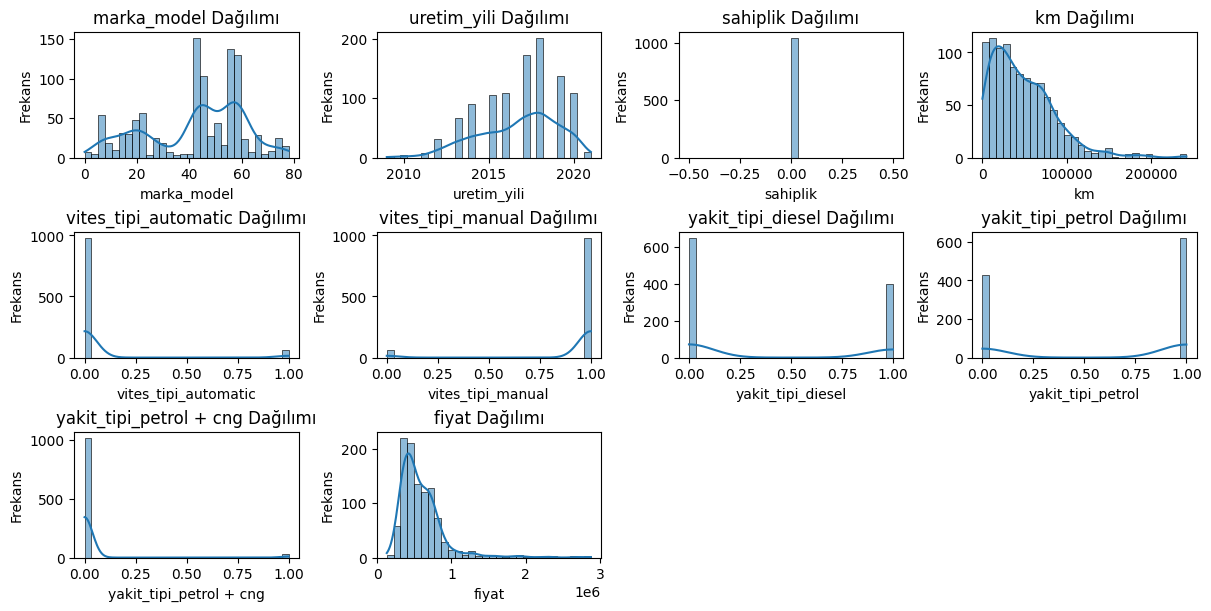

In [108]:
# Her bir özellik için histogram grafikleri 4'erli oluşturma
num_columns = len(df.columns)
rows = math.ceil(num_columns / 4)
fig, axes = plt.subplots(rows,4 , figsize=(12, 2 * rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{column} Dağılımı")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frekans")

# Kalan boş grafik alanlarını temizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


Her bir özelliğin **BoxPlot** Grafikleri 

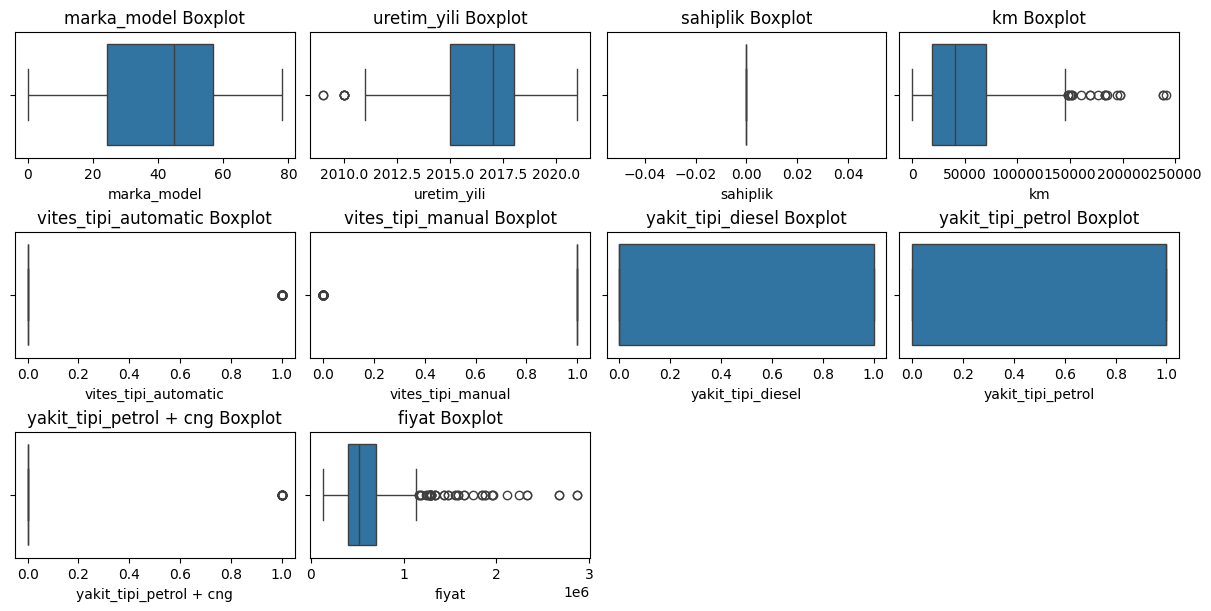

In [109]:
num_columns = len(df.columns)
rows = math.ceil(num_columns / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, 2 * rows), constrained_layout=True)
axes = axes.flatten()  # Axisleri 1D diziye çevirelim

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f"{column} Boxplot")
    axes[i].set_xlabel(column)

# Kalan boş grafik alanlarını temizleyelim
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Özellikler arası ilişkiyi gösteren **Korelasyon Matrisi Isı Haritası**

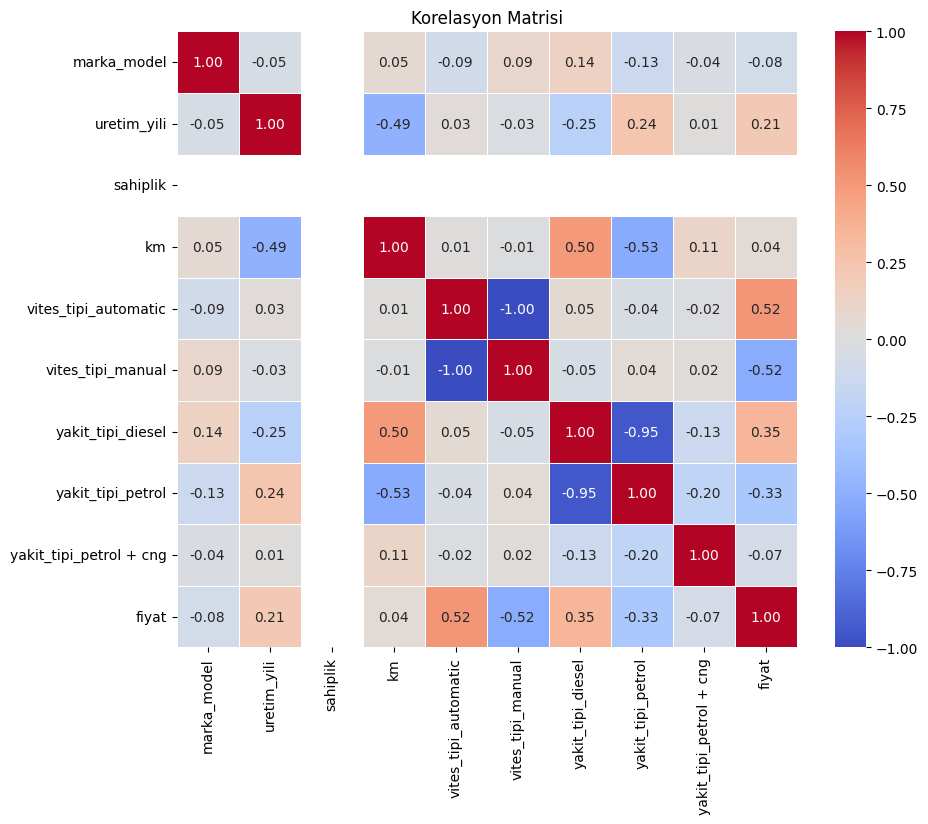

In [110]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()


**Yakıt tipi** ve **vites türüne** göre fiyat analizi

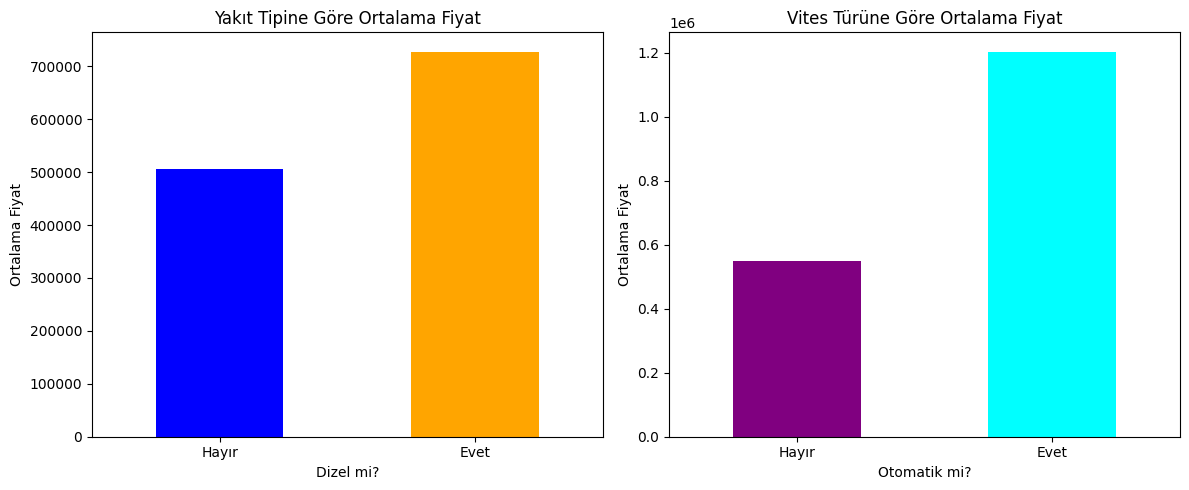

In [111]:

# Yakıt tipine göre fiyatların ortalaması
yakit_fiyat = df.groupby('yakit_tipi_diesel')['fiyat'].mean()

# Vites türüne göre fiyatların ortalaması
vites_fiyat = df.groupby('vites_tipi_automatic')['fiyat'].mean()

# Yan yana grafikler için subplotlar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Yakıt tipine göre
yakit_fiyat.plot(kind='bar', color=['blue', 'orange'], ax=axes[0])
axes[0].set_title("Yakıt Tipine Göre Ortalama Fiyat")
axes[0].set_xlabel("Dizel mi?")
axes[0].set_ylabel("Ortalama Fiyat")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Hayır", "Evet"], rotation=0)

#Vites türüne göre
vites_fiyat.plot(kind='bar', color=['purple', 'cyan'], ax=axes[1])
axes[1].set_title("Vites Türüne Göre Ortalama Fiyat")
axes[1].set_xlabel("Otomatik mi?")
axes[1].set_ylabel("Ortalama Fiyat")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Hayır", "Evet"], rotation=0)

plt.tight_layout()
plt.show()


### Modelleme zamanı...

Bazı kaynaklardan ve yapay zekadan yararlanarak en iyi sonucu alabileceğim makine öğrenmesi modellerini belirledim. Ardından bunlarla alakalı deneme yanılma yollarıyla çok test yaptım onları koymuyorum, gereksiz kod fazlalığı oluşmasın. Yaptığım araştırma ve testlerden sonra belirlediğim *modeller* ve *parametreleri* ile makineyi eğitiyorum ve sonuçları alıyorum.

In [112]:
# Veri setini eğitim ve test olarak ayıralım
x = df.drop("fiyat", axis=1)
y = df["fiyat"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Kullanacağım modellerin oluşturulması ve en iyi sonuç parametreleri
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

# Sonuçları saklamak için bir sözlük oluşturalım
results = {}

# Modelleri eğitip test edelim
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest", "Gradient Boosting"]:
        accuracy = r2_score(y_test, y_pred) * 100  # R² skorunu yüzdeye çevirelim
    elif name == "KNN":
        accuracy = 100 - mean_absolute_error(y_test, y_pred) / y_test.mean() * 100  # KNN'de R² skoru olmadığı için ortalama hata üzerinden hesaplayalım

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "Doğruluk Yüzdesi": accuracy
    }

# Sonuçları yazdıralım
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Doğruluk Yüzdesi: {metrics['Doğruluk Yüzdesi']:.2f}%")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print("\n")

Model: Linear Regression
  Doğruluk Yüzdesi: 44.24%
  MSE: 44601414454.1821
  RMSE: 211190.4696


Model: Ridge Regression
  Doğruluk Yüzdesi: 44.36%
  MSE: 44508776455.0719
  RMSE: 210971.0323


Model: Lasso Regression
  Doğruluk Yüzdesi: 44.24%
  MSE: 44601375430.7995
  RMSE: 211190.3772


Model: Random Forest
  Doğruluk Yüzdesi: 79.36%
  MSE: 16506494071.4714
  RMSE: 128477.6014


Model: Gradient Boosting
  Doğruluk Yüzdesi: 87.18%
  MSE: 10255281924.4648
  RMSE: 101268.3659


Model: KNN
  Doğruluk Yüzdesi: 65.60%
  MSE: 73441490175.2381
  RMSE: 271000.9044




Bir de sonuç grafiğinde görelim.

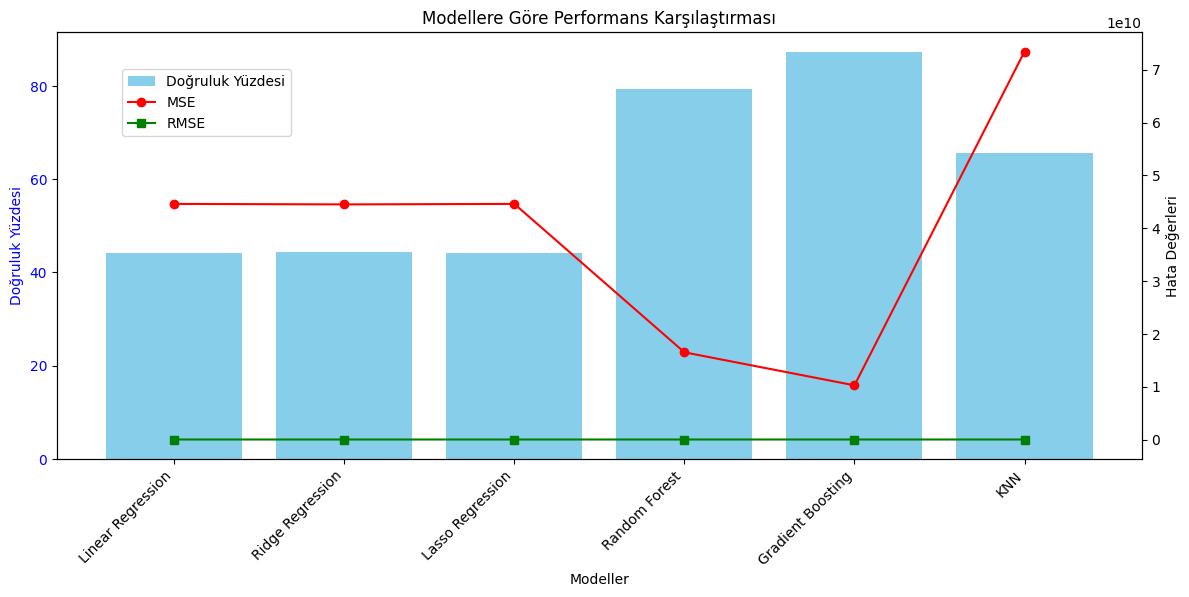

In [113]:
model_names = list(results.keys())
accuracies = [metrics['Doğruluk Yüzdesi'] for metrics in results.values()]
mses = [metrics['MSE'] for metrics in results.values()]
rmses = [metrics['RMSE'] for metrics in results.values()]

x = range(len(model_names))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Doğruluk oranı için çubuk grafiği
ax1.bar(x, accuracies, color='skyblue', label='Doğruluk Yüzdesi')
ax1.set_xlabel('Modeller')
ax1.set_ylabel('Doğruluk Yüzdesi', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

# MSE ve RMSE için ikincil eksen
ax2 = ax1.twinx()
ax2.plot(x, mses, color='red', marker='o', label='MSE')
ax2.plot(x, rmses, color='green', marker='s', label='RMSE')
ax2.set_ylabel('Hata Değerleri', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Modellere Göre Performans Karşılaştırması')
plt.show()


### Evet, Sonuçlar.

*Gradient Boosting* modeli **%87.18** doğruluk oranıyla açık ara en iyi sonuçları verdi. Onu **%79.36** ile *Random Forest* takip etti, bu da oldukça iyi bir değer. *Linear*, *Ridge* ve *Lasso* regresyon modelleri olmasına rağmen **%44** civarında kaldı, bu veri setine uymadı. *KNN*, **%65.60** doğruluğa ulaşsa da yüksek hata oranları oluştu bu nedenle diğer modellere göre zayıf kaldı. Özetle, fiyat tahmini için ***Gradient Boosting*** ve ***Random Forest*** doğrulukta en iyi modeller oldu.